In [150]:
## Data Analysis
# Ethan L. Edmunds, Jan 2025

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [151]:
# Pull in the dataframes
df_critical_current = pd.read_csv('critical_current_data')
df_raw_data = pd.read_csv('Full_ICY_Durham_Data_processed')


print(df_raw_data.head())
print(df_critical_current.head())

   Tesla  Angle   Current   Voltage   Time  Fixed_Voltage  Electric Field
0   0.15    0.0 -0.016081  1.833614  0.046       0.055995        4.409079
1   0.15    0.0 -0.016235  1.850597  0.092       0.072984        5.746763
2   0.15    0.0 -0.016093  1.850638  0.465       0.073020        5.749586
3   0.15    0.0 -0.016118  1.853878  0.512       0.076261        6.004776
4   0.15    0.0 -0.016013  1.853580  0.558       0.075959        5.981012
   Tesla  Angle  Critical Current
0   0.15    0.0         51.170583
1   0.15  120.0         57.567812
2   0.15  150.0         54.395248
3   0.15   40.0         56.289816
4   0.15   60.0         61.715172


[0.0, 30.0, 40.0, 60.0, 90.0, 120.0, 150.0]
[0.0, 0.15, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6, 0.7]


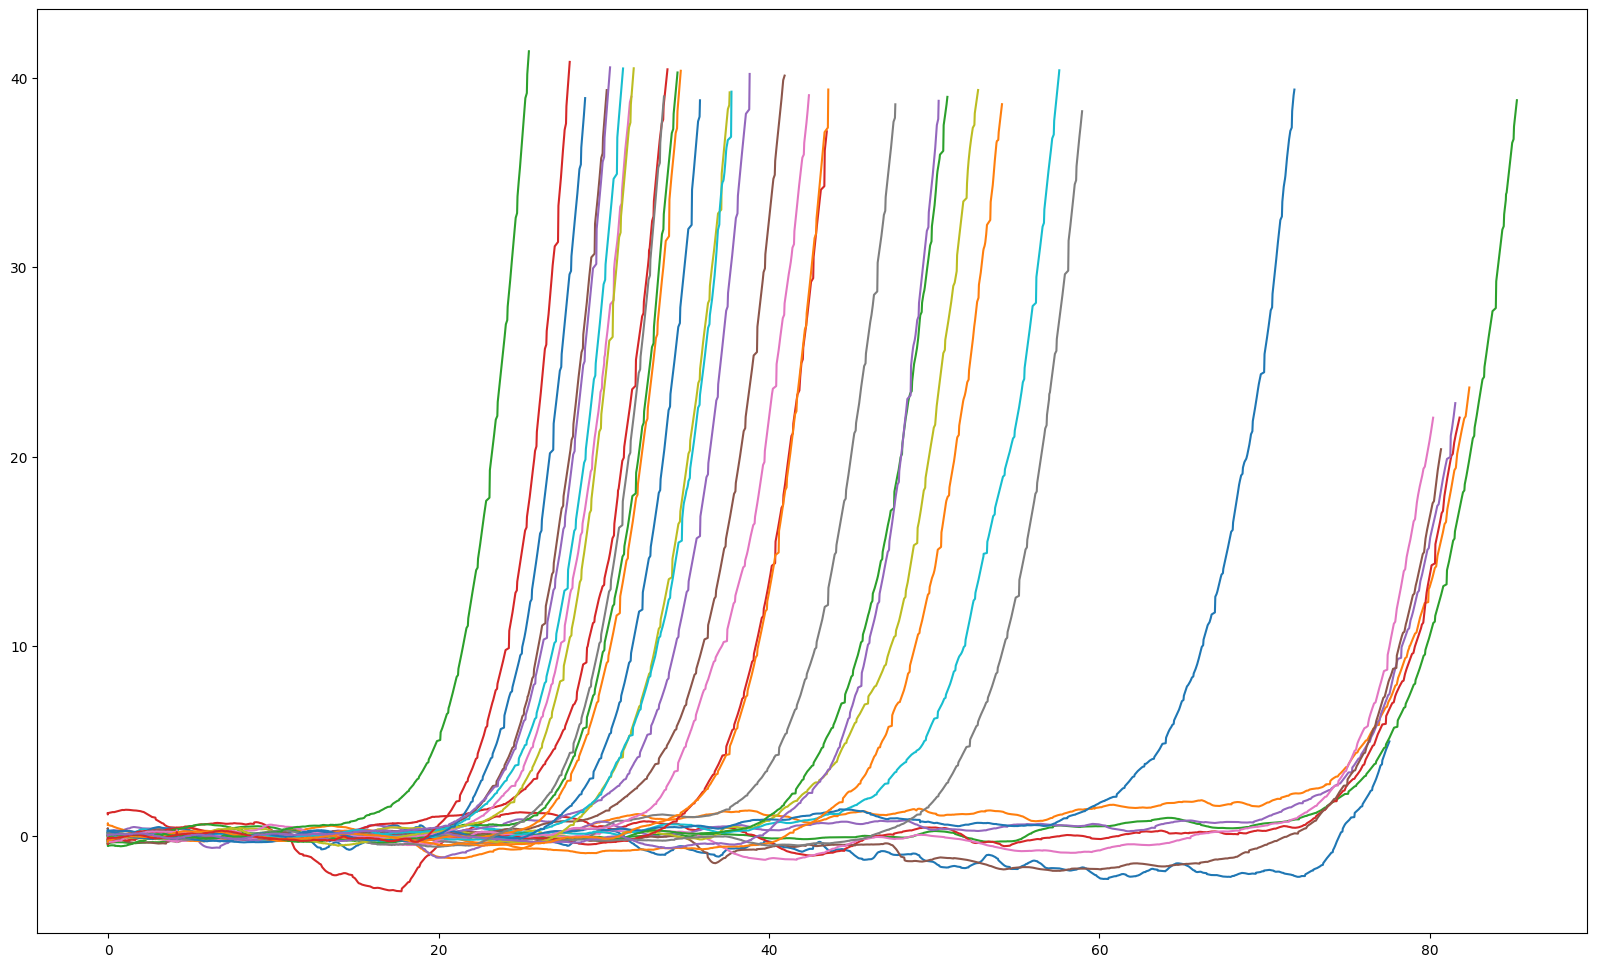

In [152]:
# Plots for raw data
df_raw_data_sorted = df_raw_data.sort_values(by=['Tesla', 'Angle', 'Current'], ascending=[True, True, True])

unique_tesla = sorted(df_raw_data['Tesla'].unique()) # Unique values for tesla
unique_angle = sorted(df_raw_data['Angle'].unique()) # Unique values for angle

print(unique_angle)
print(unique_tesla)

plt.figure(figsize=(20, 12))

for tesla in unique_tesla:
    for angle in unique_angle:

        df = df_raw_data_sorted.loc[(df_raw_data_sorted['Tesla'] == tesla) & (df_raw_data_sorted['Angle'] == angle)]

        if not df.empty:

            plt.plot(df['Current'], df['Fixed_Voltage'])


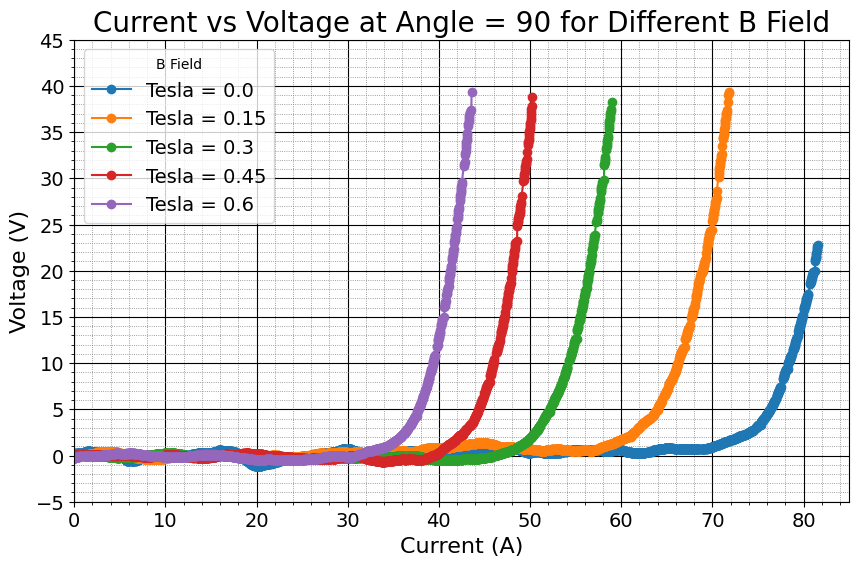

In [153]:
# Plotting raw data by Magentic Field Strength
# Filter the data for Angle = 90
df_angle_90 = df_raw_data_sorted[df_raw_data_sorted['Angle'] == 90]

# Create the plot
plt.figure(figsize=(10, 6))

# Get the unique Tesla values
unique_tesla = df_angle_90['Tesla'].unique()

# Loop through each Tesla value and plot the data for Angle = 90
for tesla in unique_tesla:
    # Filter the data for the current Tesla value and Angle = 90
    tesla_data = df_angle_90[df_angle_90['Tesla'] == tesla]

    # Plot the data (Current vs Current) for the current Tesla value at Angle = 90
    plt.plot(tesla_data['Current'], tesla_data['Fixed_Voltage'], label=f'Tesla = {tesla}', marker='o')

# Adding labels and legend
plt.xlim((0, 85))  # x-axis from 0 to 150
plt.ylim((-5, 45))  # y-axis from 20 to 100

# Set x and y ticks
plt.xticks(range(0, 86, 10))  # x-axis ticks every 10 units from 0 to 85
plt.yticks(range(-5, 46, 5))  # y-axis ticks every 5 units from -5 to 45

plt.tick_params(axis='x', labelsize=14)  # Change font size of x-axis ticks
plt.tick_params(axis='y', labelsize=14)  # Change font size of y-axis ticks

# Enable minor ticks
plt.minorticks_on()

# Title and axis labels with font size adjustments
plt.title('Current vs Voltage at Angle = 90 for Different B Field', fontsize=20)
plt.xlabel('Current (A)', fontsize=16)
plt.ylabel('Voltage (V)', fontsize=16)

# Set the legend with a specific font size
plt.legend(title='B Field', fontsize=14)

# Customize gridlines: major and minor
plt.grid(True, which='both')
plt.grid(which='major', color='black', linewidth=0.8)  # Major gridlines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.6)  # Minor gridlines

# Save the figure as PNG with transparency, high DPI, and tight bounding box
plt.savefig('images/voltage_current_angle.png', transparent=True, dpi=250, bbox_inches='tight')

# Display the plot
plt.show()

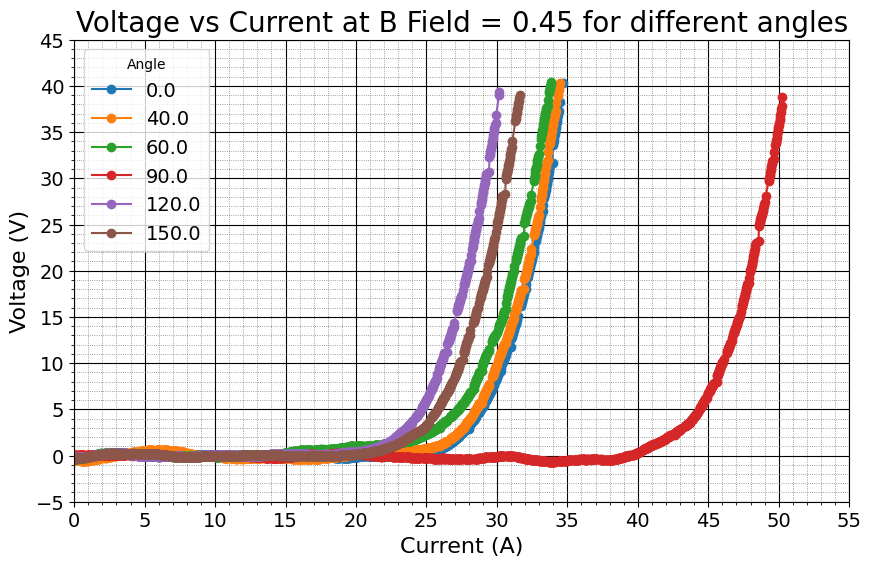

In [154]:
# Filter the data for Angle = 90
df_tesla_45 = df_raw_data_sorted[df_raw_data_sorted['Tesla'] == 0.45]

# Create the plot
plt.figure(figsize=(10, 6))

# Get the unique Tesla values
unique_angle = df_tesla_45['Angle'].unique()

# Loop through each Tesla value and plot the data for Angle = 90
for angle in unique_angle:
    # Filter the data for the current Tesla value and Angle = 90
    tesla_data = df_tesla_45[df_tesla_45['Angle'] == angle]

    # Plot the data (Current vs Current) for the current Tesla value at Angle = 90
    plt.plot(tesla_data['Current'], tesla_data['Fixed_Voltage'], label=f'{angle}', marker='o')

# Adding labels and legend
plt.xlim((0, 55))  # x-axis from 0 to 150
plt.ylim((-5, 45))  # y-axis from 20 to 100

# Set x and y ticks with proper ranges, ensuring they align with the axis limits
plt.xticks(range(0, 56, 5))  # x-axis ticks every 5 units from 0 to 55
plt.yticks(range(-5, 46, 5))  # y-axis ticks every 5 units from -10 to 45

plt.tick_params(axis='x', labelsize=14)  # Change font size of x-axis ticks
plt.tick_params(axis='y', labelsize=14)  # Change font size of y-axis ticks

# Enable minor ticks
plt.minorticks_on()

# Title and axis labels with font size adjustments
plt.title('Voltage vs Current at B Field = 0.45 for different angles', fontsize=20)
plt.xlabel('Current (A)', fontsize=16)
plt.ylabel('Voltage (V)', fontsize=16)

# Set the legend with a specific font size
plt.legend(title='Angle', fontsize=14)

# Customize gridlines: major and minor
plt.grid(True, which='both')
plt.grid(which='major', color='black', linewidth=0.8)  # Major gridlines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.6)  # Minor gridlines

# Save the figure as PNG with transparency, high DPI, and tight bounding box
plt.savefig('images/voltage_current_tesla.png', transparent=True, dpi=250, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
# Plot Field Angle vs Critical Current
# Get the unique Tesla values
unique_tesla = sorted(df_critical_current['Tesla'].unique())

print(unique_tesla)

df_critical_current_sorted = df_critical_current.sort_values(by=['Tesla', 'Angle'], ascending=[True, True])

polyfit_degree = 4

# Create a plot
plt.figure(figsize=(14, 7))

# List to store the labels in the desired order
handles, labels = [], []

# Loop through each unique Tesla value and plot the data
for tesla in unique_tesla:

    # Filter the data for the current Tesla value
    tesla_data = df_critical_current_sorted.loc[df_critical_current_sorted['Tesla'] == tesla]

    if len(tesla_data) > 3:

        # Sort the data by Angle to make the plot meaningful
        tesla_data_sorted = tesla_data.sort_values(by='Angle')

        # Check if there is more
        coefficients = np.polyfit(tesla_data['Angle'], tesla_data['Critical Current'], polyfit_degree)
        polynomial = np.poly1d(coefficients)

        x_fit = np.linspace(min(tesla_data['Angle']), max(tesla_data['Angle']), 1000)

        y_fit = polynomial(x_fit)

        # Scatter plot the data (Critical Current vs Angle)
        plt.plot(tesla_data_sorted['Angle'], tesla_data_sorted['Critical Current'], label=f'{tesla}T', marker='o', linewidth=2)
        # plt.plot(x_fit, y_fit)

# Adding labels and legend
plt.xlim((0, 150))  # x-axis from 0 to 150
plt.ylim((20, 100))  # y-axis from 20 to 100

# Set x and y ticks with proper ranges, ensuring they align with the axis limits
plt.xticks(np.arange(0, 151, 10))  # x-axis ticks from 0 to 150, step 10
plt.yticks(np.arange(20, 101, 10))  # y-axis ticks from 20 to 100, step 10

plt.tick_params(axis='x', labelsize=14)  # Change font size of x-axis ticks
plt.tick_params(axis='y', labelsize=14)  # Change font size of y-axis ticks

# Enable minor ticks
plt.minorticks_on()

# Title and axis labels with font size adjustments
plt.title('Critical Current vs Angle for Different Tesla Values', fontsize=20)
plt.xlabel('Angle (degrees)', fontsize=16)
plt.ylabel('Critical Current (A)', fontsize=16)

# Set the legend with a specific font size
plt.legend(title='B Field', fontsize=14)

# Customize gridlines: major and minor
plt.grid(True, which='both')
plt.grid(which='major', color='black', linewidth=0.8)  # Major gridlines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.6)  # Minor gridlines

# Save the figure as PNG with transparency, high DPI, and tight bounding box
plt.savefig('images/critical_current_angle.png', transparent=True, dpi=250, bbox_inches='tight')

# Display the plot
plt.show()

[0.0, 0.15, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6, 0.7]


    Tesla  Angle  Critical Current
28   0.00    0.0         80.296976
0    0.15    0.0         51.170583
6    0.20    0.0         46.617856
7    0.30    0.0         41.898477
19   0.40    0.0         38.661980
13   0.45    0.0         37.393734
20   0.50    0.0         36.404475
21   0.60    0.0         34.461546
27   0.70    0.0         33.161385


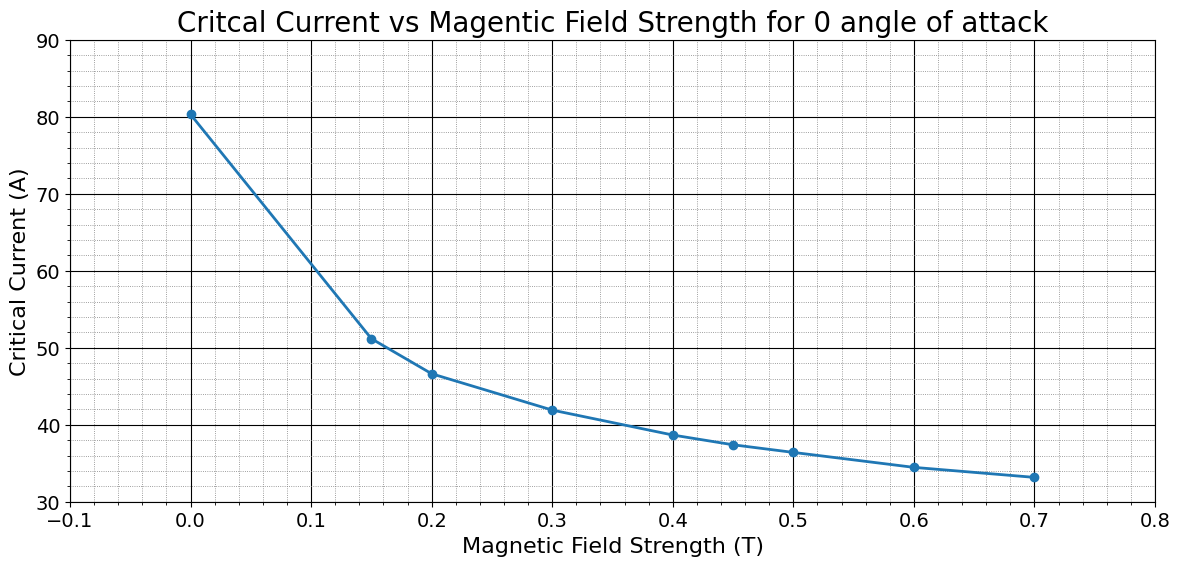

In [144]:
unique_angle = sorted(df_critical_current['Angle'].unique())

angle_data = df_critical_current_sorted.loc[df_critical_current_sorted['Angle'] == unique_angle[0]]

print(angle_data)

# Set the figure
plt.figure(figsize=(14, 6))

# Plot the data
plt.plot(angle_data['Tesla'], angle_data['Critical Current'], linewidth=2, marker='o')

# Adding labels and legend
plt.xlim((0.5, 0.75))  # x-axis from 0 to 150
plt.ylim((30, 90))  # y-axis from 20 to 90

# Set x and y ticks with proper ranges, ensuring they align with the axis limits
plt.xticks(np.arange(-0.1, 0.9, 0.1))  # x-axis ticks
plt.yticks(np.arange(30, 100, 10))  # y-axis ticks

plt.tick_params(axis='x', labelsize=14)  # Change font size of x-axis ticks
plt.tick_params(axis='y', labelsize=14)  # Change font size of y-axis ticks

# Enable minor ticks
plt.minorticks_on()

# Title and axis labels with font size adjustments
plt.title('Critcal Current vs Magentic Field Strength for 0 angle of attack', fontsize=20)
plt.xlabel('Magnetic Field Strength (T)', fontsize=16)
plt.ylabel('Critical Current (A)', fontsize=16)

# Customize gridlines: major and minor
plt.grid(True, which='both')
plt.grid(which='major', color='black', linewidth=0.8)  # Major gridlines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.6)  # Minor gridlines

# Save the figure as PNG with transparency, high DPI, and tight bounding box
plt.savefig('images/critical_current_angle_0.png', transparent=True, dpi=250, bbox_inches='tight')

# Display the plot
plt.show()